In [28]:
from io import StringIO
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import itertools

%matplotlib inline

df = pd.read_csv(StringIO("""
Catalog,Entity,Model,F1.Mean,F1.STD,Prec.Mean,Prec.STD,Recall.Mean,Recall.STD
discogs,band,linear_support_vector_machines,0.925262,0.001267,0.896373,0.002110,0.956090,0.003388
discogs,musician,linear_support_vector_machines,0.936944,0.001224,0.905424,0.002080,0.970741,0.000880
imdb,writer,linear_support_vector_machines,0.928606,0.001983,0.919005,0.002274,0.938421,0.003574
imdb,actor,linear_support_vector_machines,0.894011,0.000789,0.875260,0.002088,0.913592,0.001998
imdb,director,linear_support_vector_machines,0.912727,0.001597,0.880551,0.005850,0.947397,0.003670
imdb,producer,linear_support_vector_machines,0.905975,0.003885,0.894173,0.006799,0.918114,0.001219
imdb,musician,linear_support_vector_machines,0.917906,0.001399,0.909440,0.002345,0.926534,0.001067
musicbrainz,band,linear_support_vector_machines,0.913877,0.001689,0.961199,0.003976,0.871046,0.006050
musicbrainz,musician,linear_support_vector_machines,0.954410,0.001406,0.942882,0.002112,0.966225,0.001090
discogs,musician,logistic_regression,0.938138,0.001693,0.917022,0.002191,0.960250,0.001370
discogs,band,logistic_regression,0.924791,0.001550,0.908952,0.001476,0.941198,0.003025
imdb,director,logistic_regression,0.913846,0.000694,0.892154,0.004468,0.936658,0.003834
imdb,producer,logistic_regression,0.906045,0.002643,0.898064,0.005640,0.914192,0.000826
imdb,actor,logistic_regression,0.893573,0.000579,0.878388,0.001838,0.909299,0.001406
imdb,musician,logistic_regression,0.917958,0.001717,0.908442,0.002911,0.927680,0.001280
imdb,writer,logistic_regression,0.928108,0.002082,0.924621,0.001792,0.931635,0.004264
musicbrainz,band,logistic_regression,0.918022,0.002327,0.937643,0.002251,0.899217,0.003973
musicbrainz,musician,logistic_regression,0.953083,0.001301,0.943755,0.002042,0.962600,0.001165
discogs,band,multi_layer_perceptron,0.928931,0.001310,0.915249,0.001875,0.943032,0.001727
discogs,musician,multi_layer_perceptron,0.940715,0.001443,0.921507,0.001770,0.960754,0.003867
imdb,director,multi_layer_perceptron,0.919340,0.000980,0.899994,0.002724,0.939548,0.002002
imdb,actor,multi_layer_perceptron,0.896922,0.000400,0.880657,0.003412,0.913832,0.004129
imdb,producer,multi_layer_perceptron,0.909398,0.002913,0.894253,0.007249,0.925119,0.003188
imdb,musician,multi_layer_perceptron,0.925888,0.001165,0.942860,0.001545,0.909520,0.001863
imdb,writer,multi_layer_perceptron,0.930302,0.002571,0.924571,0.003714,0.936149,0.006365
musicbrainz,band,multi_layer_perceptron,0.921134,0.002588,0.926546,0.004402,0.915818,0.004989
musicbrainz,musician,multi_layer_perceptron,0.957375,0.001629,0.944146,0.004491,0.971004,0.002647
discogs,musician,naive_bayes,0.931622,0.001314,0.903489,0.002155,0.961565,0.000812
discogs,band,naive_bayes,0.922386,0.001457,0.891462,0.001633,0.955542,0.003274
imdb,musician,naive_bayes,0.904327,0.013959,0.868388,0.055110,0.948158,0.033475
imdb,producer,naive_bayes,0.898657,0.004254,0.842785,0.008230,0.962525,0.001450
imdb,director,naive_bayes,0.907755,0.002541,0.855312,0.005063,0.967075,0.001997
imdb,writer,naive_bayes,0.922121,0.002580,0.882778,0.004051,0.965145,0.002172
imdb,actor,naive_bayes,0.889563,0.001311,0.825956,0.002002,0.963789,0.001153
musicbrainz,musician,naive_bayes,0.952783,0.001847,0.953561,0.002394,0.952008,0.001847
musicbrainz,band,naive_bayes,0.907094,0.001994,0.953012,0.001335,0.865401,0.002974
discogs,band,random_forest,0.921673,0.001084,0.909216,0.002648,0.934490,0.002988
discogs,musician,random_forest,0.933460,0.002427,0.917496,0.003021,0.949992,0.002296
imdb,musician,random_forest,0.922135,0.000594,0.932216,0.000733,0.912272,0.001018
imdb,producer,random_forest,0.906239,0.004720,0.895270,0.008984,0.917553,0.005214
imdb,director,random_forest,0.916903,0.000940,0.892806,0.003096,0.942355,0.002601
imdb,writer,random_forest,0.929301,0.002919,0.922216,0.004160,0.936508,0.003393
imdb,actor,random_forest,0.899161,0.000836,0.879621,0.001427,0.919592,0.001620
musicbrainz,band,random_forest,0.918844,0.002231,0.938321,0.005419,0.900192,0.003714
musicbrainz,musician,random_forest,0.953673,0.001146,0.943972,0.001591,0.963577,0.001052
discogs,band,single_layer_perceptron,0.925647,0.001462,0.908264,0.001465,0.943716,0.003188
discogs,musician,single_layer_perceptron,0.938168,0.001664,0.917755,0.002291,0.959510,0.001258
imdb,actor,single_layer_perceptron,0.893205,0.000591,0.881499,0.001829,0.905232,0.001676
imdb,musician,single_layer_perceptron,0.917503,0.001383,0.909845,0.002659,0.925296,0.000865
imdb,director,single_layer_perceptron,0.914070,0.000545,0.895414,0.003822,0.933551,0.003516
imdb,producer,single_layer_perceptron,0.905526,0.002380,0.903146,0.006456,0.907958,0.001993
imdb,writer,single_layer_perceptron,0.927724,0.001915,0.924983,0.002891,0.930499,0.003970
musicbrainz,musician,single_layer_perceptron,0.953054,0.001383,0.943662,0.002094,0.962638,0.001341
musicbrainz,band,single_layer_perceptron,0.915977,0.002302,0.946439,0.002538,0.887441,0.005184
"""))

In [29]:
from collections import defaultdict
topd3 = defaultdict(lambda: defaultdict(dict))

In [30]:
def sort_by_metric(metric, n_res = 3, only_x=None) -> pd.DataFrame:
    interm = df.sort_values(["Catalog","Entity", metric], ascending=False).groupby(["Catalog","Entity"])
    
    if only_x is not None:
        conct= pd.concat([x[1].head(n_res).iloc[only_x] for x in interm])
    else:
        conct= pd.concat([x[1].head(n_res) for x in interm])
    return conct[["Catalog", "Entity", "Model", metric]]
    
joined = pd.concat([sort_by_metric("F1.Mean").reset_index(drop=True), sort_by_metric("Prec.Mean").reset_index(drop=True), sort_by_metric("Recall.Mean").reset_index(drop=True)], axis=1)

In [31]:
print(joined.to_csv(index=False, float_format="%.6f"))

Catalog,Entity,Model,F1.Mean,Catalog,Entity,Model,Prec.Mean,Catalog,Entity,Model,Recall.Mean
discogs,band,multi_layer_perceptron,0.928931,discogs,band,multi_layer_perceptron,0.915249,discogs,band,linear_support_vector_machines,0.956090
discogs,band,single_layer_perceptron,0.925647,discogs,band,random_forest,0.909216,discogs,band,naive_bayes,0.955542
discogs,band,linear_support_vector_machines,0.925262,discogs,band,logistic_regression,0.908952,discogs,band,single_layer_perceptron,0.943716
discogs,musician,multi_layer_perceptron,0.940715,discogs,musician,multi_layer_perceptron,0.921507,discogs,musician,linear_support_vector_machines,0.970741
discogs,musician,single_layer_perceptron,0.938168,discogs,musician,single_layer_perceptron,0.917755,discogs,musician,naive_bayes,0.961565
discogs,musician,logistic_regression,0.938138,discogs,musician,random_forest,0.917496,discogs,musician,multi_layer_perceptron,0.960754
imdb,actor,random_forest,0.899161,imdb,actor,single_layer_perceptron,0.881499,i

In [32]:
all_top_models= set()
all_top_models = all_top_models.union(set(sort_by_metric("F1.Mean")["Model"].values.tolist()))
all_top_models = all_top_models.union(set(sort_by_metric("Prec.Mean")["Model"].values.tolist()))
all_top_models = all_top_models.union(set(sort_by_metric("Recall.Mean")["Model"].values.tolist()))
all_top_models

{'linear_support_vector_machines',
 'logistic_regression',
 'multi_layer_perceptron',
 'naive_bayes',
 'random_forest',
 'single_layer_perceptron'}

In [33]:
model_name_map = {'gated_classifier': 'gc',
 'linear_support_vector_machines': 'lsvm',
 'logistic_regression': 'lr',
 'multi_layer_perceptron': 'mlp',
 'naive_bayes': 'nb',
 'random_forest': 'rf',
 'single_layer_perceptron': 'slp',
 'stacked_classifier': 'sc',
 'voting_classifier_hard': 'vh',
 'voting_classifier_soft': 'vs'}

import matplotlib as mpl
mpl.rcParams['font.size'] = 14.0

Text(0.5, 1.0, 'Occurrences in 3rd position')

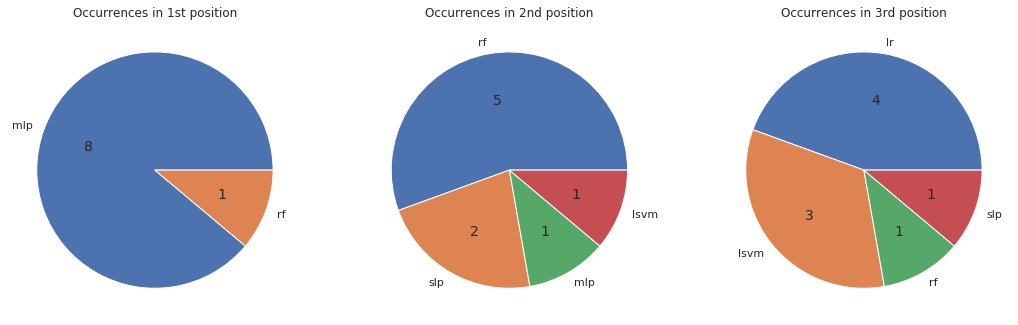

In [34]:
fig, axes = plt.subplots(1,3, figsize=(18, 6))
metric = "F1.Mean"
# metric = "Prec.Mean"
# metric = "Recall.Mean"
autopctl = lambda p: int(p * 9/100)

data = sort_by_metric(metric,only_x=0)["Model"].value_counts()
labels = [model_name_map[x] for x in data.index.tolist()]
g = data.plot.pie(autopct=autopctl, ax=axes[0], labels=labels)
g.set_ylabel("")
g.set_title("Occurrences in 1st position")

data = sort_by_metric(metric,only_x=1)["Model"].value_counts()
labels = [model_name_map[x] for x in data.index.tolist()]
g = data.plot.pie(autopct=autopctl, ax=axes[1], labels=labels)
g.set_ylabel("")
g.set_title("Occurrences in 2nd position")

data = sort_by_metric(metric,only_x=2)["Model"].value_counts()
labels = [model_name_map[x] for x in data.index.tolist()]
g = data.plot.pie(autopct=autopctl, ax=axes[2], labels=labels)
g.set_ylabel("")
g.set_title("Occurrences in 3rd position")

In [35]:
model_summaries = []

for mod, ddf in df.groupby("Model"):
    ms = ddf.mean()
    model_summaries.append({
        "Model": model_name_map[mod],
        "Avg.F1": ms["F1.Mean"],
        "Avg.F1.STD":  ms["F1.STD"],
        "Avg.Prec":  ms["Prec.Mean"],
        "Avg.Prec.STD":  ms["Prec.STD"],
        "Avg.Recall":  ms["Recall.Mean"],
        "Avg.Recall.STD": ms["Recall.STD"] ,
    })

best_models_average = pd.DataFrame(model_summaries).sort_values('Avg.F1', ascending=False)
print(best_models_average.to_csv(index=False, float_format="%.6f"))

Model,Avg.F1,Avg.F1.STD,Avg.Prec,Avg.Prec.STD,Avg.Recall,Avg.Recall.STD
mlp,0.925556,0.001667,0.916643,0.003465,0.934975,0.003420
rf,0.922377,0.001877,0.914570,0.003453,0.930726,0.002655
lr,0.921507,0.001621,0.912116,0.002734,0.931414,0.002349
slp,0.921208,0.001514,0.914556,0.002894,0.928427,0.002555
lsvm,0.921080,0.001693,0.909367,0.003293,0.934240,0.002548
nb,0.915145,0.003473,0.886305,0.009108,0.949023,0.005462



In [36]:
best_models_average.sort_values("Avg.Recall",ascending=False)

,Model,Avg.F1,Avg.F1.STD,Avg.Prec,Avg.Prec.STD,Avg.Recall,Avg.Recall.STD
3,nb,0.915145,0.003473,0.886305,0.009108,0.949023,0.005462
2,mlp,0.925556,0.001667,0.916643,0.003465,0.934975,0.003420
0,lsvm,0.921080,0.001693,0.909367,0.003293,0.934240,0.002548
1,lr,0.921507,0.001621,0.912116,0.002734,0.931414,0.002349
4,rf,0.922377,0.001877,0.914570,0.003453,0.930726,0.002655
5,slp,0.921208,0.001514,0.914556,0.002894,0.928427,0.002555


In [37]:
short2long = {v:k for k,v in model_name_map.items()}
best_models = [short2long[x] for x in best_models_average["Model"].unique()]

bardf = pd.concat([
    df[df["Model"] == x]
 for x in best_models])

Text(0, 0.5, 'Recall Mean')

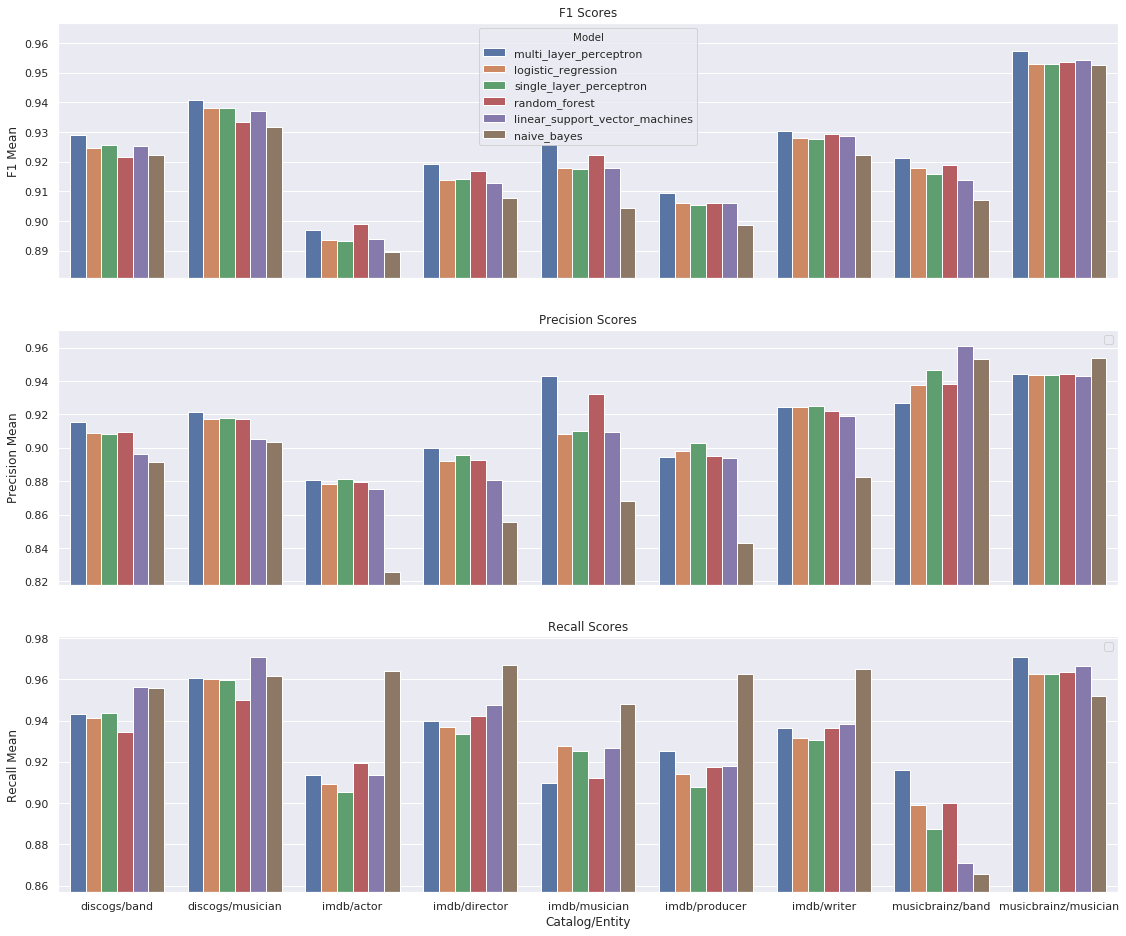

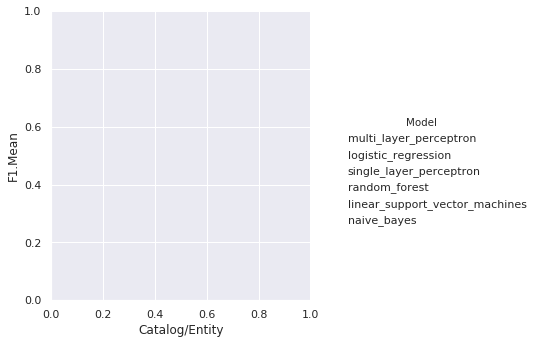

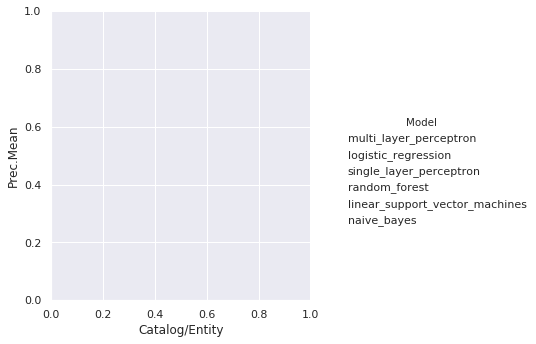

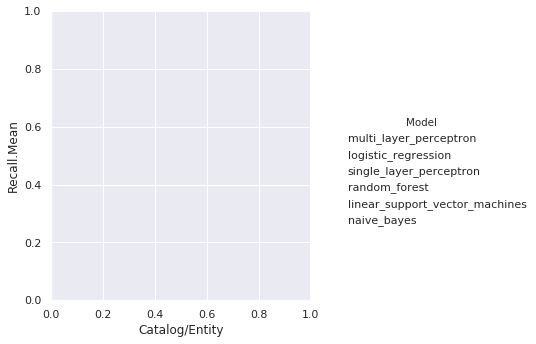

In [38]:
## Draw F1, Prec and Recall
fig, axes = plt.subplots(3, sharex=True, figsize=(19, 16))

for_graph = bardf.copy(True)
for_graph["Catalog/Entity"] = for_graph["Catalog"] + "/"  + for_graph["Entity"]
for_graph["F1.Mean"] = for_graph["F1.Mean"].astype(float)
for_graph["Prec.Mean"] = for_graph["Prec.Mean"].astype(float)
for_graph["Recall.Mean"] = for_graph["Recall.Mean"].astype(float)

for_graph = for_graph.sort_values("Catalog/Entity")

# F1 Graph
g = sns.catplot(x="Catalog/Entity", y="F1.Mean", hue="Model", data=for_graph,
                kind="bar", ax=axes[0])
ymin = for_graph["F1.Mean"].min()
ymax = for_graph["F1.Mean"].max()
axes[0].set_ylim(ymin=ymin-(ymin/100), ymax=ymax+(ymax/100))
axes[0].set_title("F1 Scores")
axes[0].set_ylabel("F1 Mean")
axes[0].set_xlabel("")


# Precision Graph
g = sns.catplot(x="Catalog/Entity", y="Prec.Mean", hue="Model", data=for_graph,
                kind="bar", ax=axes[1])
ymin = for_graph["Prec.Mean"].min()
ymax = for_graph["Prec.Mean"].max()
axes[1].set_ylim(ymin=ymin-(ymin/100), ymax=ymax+(ymax/100))
axes[1].set_title("Precision Scores")
axes[1].legend("")
axes[1].set_ylabel("Precision Mean")
axes[1].set_xlabel("")

# Recall Graph
g = sns.catplot(x="Catalog/Entity", y="Recall.Mean", hue="Model", data=for_graph,
                kind="bar", ax=axes[2])
ymin = for_graph["Recall.Mean"].min()
ymax = for_graph["Recall.Mean"].max()
axes[2].set_ylim(ymin=ymin-(ymin/100), ymax=ymax+(ymax/100))
axes[2].set_title("Recall Scores")
axes[2].legend("")
axes[2].set_ylabel("Recall Mean")


multi_layer_perceptron (0, 0)
gated_classifier (0, 1)
stacked_classifier (1, 0)
voting_classifier_soft (1, 1)
voting_classifier_hard (2, 0)


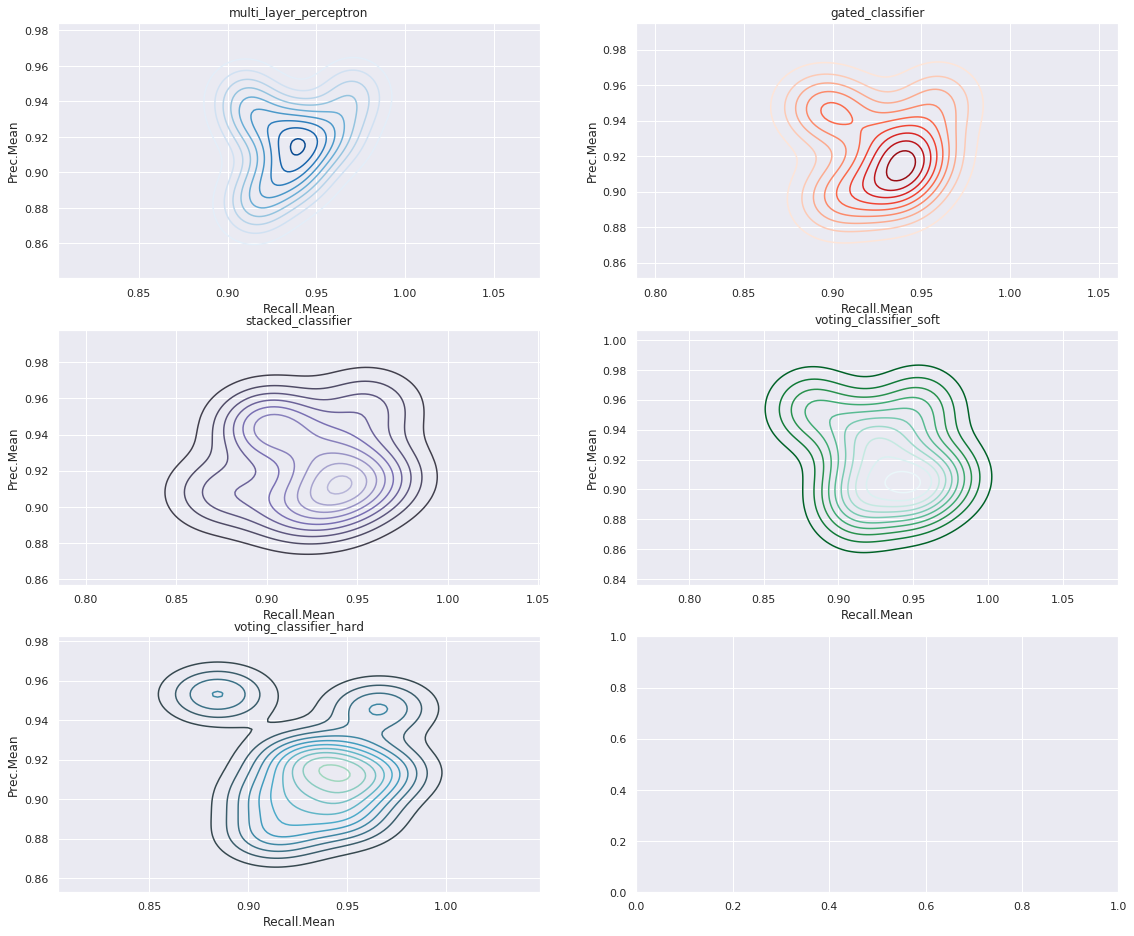

In [268]:
# show graph for precision vs recall
cmaps = ['Blues',
         'Reds',
         'Purples_d',
         'BuGn_r',
         'GnBu_d',
         sns.cubehelix_palette(light=1, as_cmap=True)]
fig, axes = plt.subplots(3, 2, figsize=(19, 16))
cat_models = iter(for_graph["Model"].unique())
for i, axi in enumerate(itertools.product([0, 1, 2], [0, 1])):
    if axi == (2,1): continue
    cm = next(cat_models)
    print(cm, axi)
    axes[axi].set_title(cm)

    only_ent_model = for_graph[for_graph["Model"] == cm]
    sns.kdeplot(only_ent_model["Recall.Mean"], only_ent_model["Prec.Mean"], cmap=cmaps[i], ax=axes[axi])
    axes[axi].axis('equal')

multi_layer_perceptron (0, 0)
gated_classifier (0, 1)
stacked_classifier (1, 0)
voting_classifier_soft (1, 1)
voting_classifier_hard (2, 0)


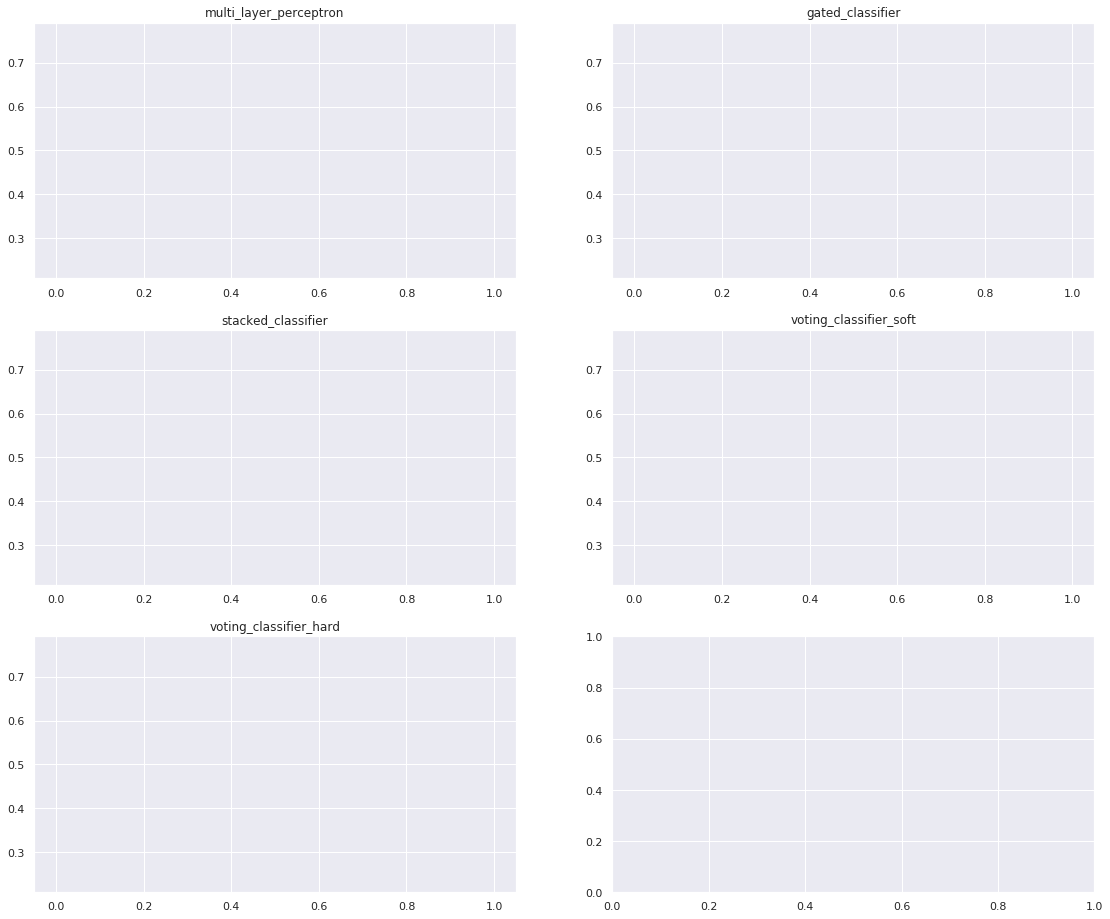

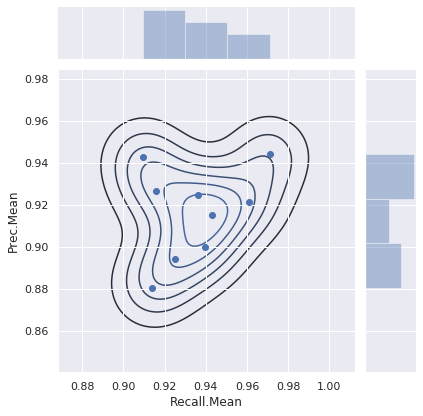

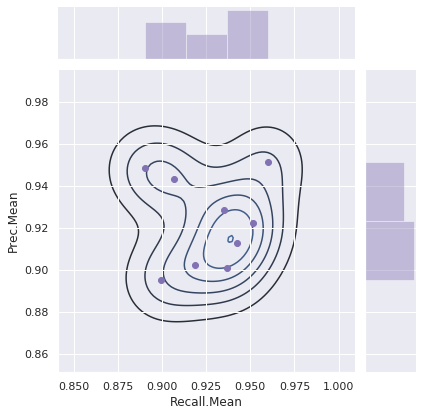

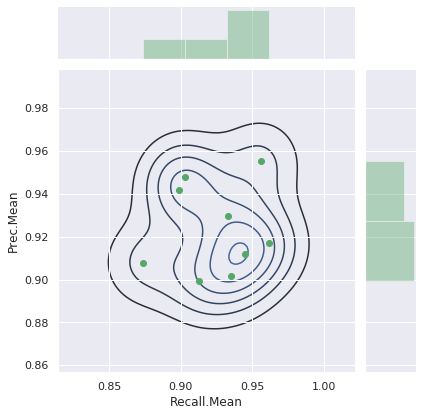

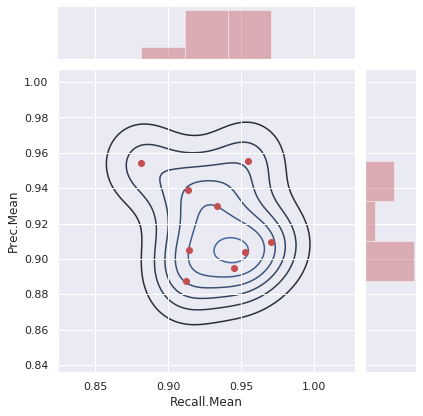

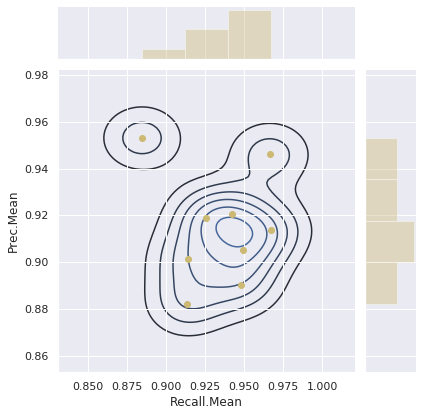

In [294]:
# show graph for precision vs recall
colors = 'bmgry'
fig, axes = plt.subplots(3, 2, figsize=(19, 16))
cat_models = iter(for_graph["Model"].unique())
for i, axi in enumerate(itertools.product([0, 1, 2], [0, 1])):
    if axi == (2,1): continue
    cm = next(cat_models)
    print(cm, axi)
    axes[axi].set_title(cm)

    only_ent_model = for_graph[for_graph["Model"] == cm]
    ww = sns.jointplot(data=only_ent_model, x="Recall.Mean", y="Prec.Mean", kind="scatter", color=colors[i]).plot_joint(sns.kdeplot, zorder=0, n_levels=6)
    
    #     sns.kdeplot(only_ent_model["Recall.Mean"], only_ent_model["Prec.Mean"], cmap=cmaps[i], ax=axes[axi])
    axes[axi].axis('equal')

